In [1]:
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Poisson Approximation to the Binomial Distribution
If we take the limit of Binomial as n --> inf and p --> 0 such that np remains fixed, we arrive at the Poisson.

This theorem implies that if n is large, p is small, and np remains fixed, we can approximate the Bin(n,p) PMF by the Pois(np) PMF.

In [102]:
def binomial(n, p, k):
    if k > n:
        return np.nan
    n_choose_k = (np.math.factorial(n))/(np.math.factorial(k) * np.math.factorial(n - k))
    return n_choose_k * p**k * (1-p)**(n-k)

In [103]:
def poisson(lmda, k):
    return (np.exp(-lmda) * lmda**k)/np.math.factorial(k)

In [104]:
def get_n_and_p(fixed_np):
    n_list = [round(i) for i in np.linspace(fixed_np+1, fixed_np+100, 50)]
    p_list = [fixed_np/i for i in n_list]
    return list(zip(n_list, p_list))

In [105]:
fig = plt.figure()
camera = Camera(fig)
for n, p in get_n_and_p(10):
    b = plt.plot(np.arange(10, 22), [binomial(n, p, k) for k in np.arange(10, 22)], color='blue', label="binomial") 
    p = plt.plot(np.arange(10, 22), [poisson(10, k) for k in np.arange(10, 22)], color='g', label="poisson")
    camera.snap()

animation = camera.animate()
plt.close()

HTML(animation.to_html5_video())
#animation.save('poisson_approximation.html', writer = 'imagemagick')

### Relationship between the PDF and CDF for continuous distributions

In [106]:
import scipy
from scipy.integrate import quad as integral
from scipy.misc import derivative
import math 

In [107]:
def pmf_normal(x):
    return (1/(np.sqrt(2*np.pi))) * np.exp((-x**2)/2)

In [108]:
x = np.linspace(-3, 3, 100)
y = [pmf_normal(i) for i in x]

In [109]:
# P(X <= 0)
integral(pmf_normal, -math.inf, 0)

(0.49999999999999983, 5.08909572547112e-09)

In [110]:
def cdf_normal(l, r):
    return integral(pmf_normal, l, r)[0]

In [111]:
cdf_y = [cdf_normal(-math.inf, i) for i in x]

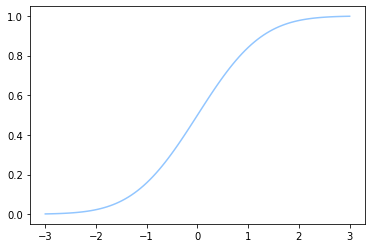

In [112]:
# cdf normal distribution
plt.plot(x, cdf_y)

In [113]:
#fit cdf function using cdf_y values
from scipy.optimize import curve_fit

def sigmoid(x, a, b):
    return 1.0 / (1.0 + np.exp(-a*(x-b)))

popt, pcov = scipy.optimize.curve_fit(sigmoid, x, cdf_y) #popt are optimum a, b parameters for fitted sigmoid

def cdf_normal(x):
    return 1.0 / (1.0 + np.exp(-popt[0]*(x-popt[1])))

fig = plt.figure(figsize=(15,10))

camera = Camera(fig)

for x1 in x[::2]:

    # Choose point to plot tangent line
    y1 = cdf_normal(x1)

    # Define tangent line
    # y = m*(x - x1) + y1
    def line(x, x1, y1):
        return derivative(cdf_normal, x1)*(x - x1) + y1

    # Plot the figure

    a = .5
    ax1 = plt.subplot(2,2,1)
    ax1.plot(x, cdf_normal(x), color='b', alpha=a)
    ax1.scatter(x1, y1, marker='o', color='g', s=100, alpha=.75)
    ax1.set_ylim(-.1, 1.1)

    ax2 = plt.subplot(2,2,2)
    ax2.plot(x, y, color='b', alpha=a)
    ax2.fill_between(x, y, 0, where=(x < x1), facecolor='g', alpha=a)
    ax2.set_ylim(0, .5)

    ax3 = plt.subplot(2,2,3)
    ax3.plot(x, cdf_normal(x), color='b', alpha=a)
    ax3.scatter(x1, y1, marker='o', color='r', s=100, alpha=a)
    ax3.plot(x, line(x, x1, y1), 'r--', linewidth = 3, alpha=a)
    ax3.set_ylim(-.1, 1.1)
    
    ax4 = plt.subplot(2,2,4)
    ax4.plot(x, y, color='b', alpha=a)
    ax4.fill_between(x, y, 0, where=((x >= x1-.1) & (x <= x1+.1)), facecolor='r', alpha=a)
    ax4.set_ylim(0, .5)
    
    camera.snap()

plt.close()
animation = camera.animate()
    
HTML(animation.to_html5_video())
    
#animation.save('cdf_pdf_relationship.html', writer = 'imagemagick')

### Universality of the Uniform

In [297]:
from scipy.stats import norm, expon

# Let...
U = [np.random.uniform(0,1) for i in range(100)] 
X = F_inverse(U) #F^-1(U)
# Then X is an r.v. with CDF F
FX = F(X)
# Thus (thus FX == U)
sum(np.round(FX, 5) == np.round(U, 5))/len(U)

1.0

In [322]:
fig = plt.figure(figsize=(15,10))
camera = Camera(fig)

all_normal_X = []
all_expon_X = []

for n in np.arange(0, 250):
    
    # Plot params
    a = .5
    
    U = [np.random.uniform(0,1) for i in range(10)]
    
    # Normal
    X = norm.ppf(U) #F^-1(U)
    all_normal_X.extend(X)
    
    x = np.linspace(-3, 3, 100)
    y = norm.pdf(x) # f(x)
    y2 = norm.cdf(x) # F(x)

    ax1 = plt.subplot(2,2,1)
    ax1.plot(x, y2, c="b", alpha=a)
    ax1.plot(x, y, c="g", alpha=a)
    ax1.scatter(X, U, marker='o', color='r', s=50, alpha=a)
    for x1, y1 in zip(X, U):
        ax1.plot([-3, x1], [y1, y1], color="r", alpha=a)
    ax1.set_ylim(0, 1)
    ax1.set_xlim(-3, 3)

    ax2 = plt.subplot(2,2,2)
    ax2.hist(all_normal_X, bins=50, color='r', alpha=a)
    ax2.set_ylim(0, 300)
    ax2.set_xlim(-3, 3)
    
    # Exponential
    X = expon.ppf(U) # F^-1(U)
    all_expon_X.extend(X)

    x = np.linspace(0, 5, 100)
    y = expon.pdf(x) # f(x)
    y2 = expon.cdf(x) # F(x)

    ax3 = plt.subplot(2,2,3)
    ax3.plot(x, y2, c="b", alpha=a)
    ax3.plot(x, y, c="g", alpha=a)
    ax3.scatter(X, U, marker='o', color='r', s=50, alpha=a)
    for x1, y1 in zip(X, U):
        ax3.plot([0, x1], [y1, y1], color="r", alpha=a)
    ax3.set_ylim(0, 1.1)
    ax3.set_xlim(0, 5)

    ax4 = plt.subplot(2,2,4)
    ax4.hist(all_expon_X, bins=50, color='r', alpha=a)
    ax4.set_ylim(0, 400)
    ax4.set_xlim(0, 5)
    
    camera.snap()
    
plt.close()
animation = camera.animate()
    
HTML(animation.to_html5_video())

### Minimum of 3 independent Exponentials is Exponential

In [417]:
%%time 
fig = plt.figure(figsize=(15,10))
camera = Camera(fig)

x_list = [2]
for i in range(0, 100):
    x_list.append(x_list[i]*1.1)
x_list = set(np.round(x_list,0))
             
total_time_to_finish_list = []
for i in range(10000):
    # Successes arrive at a rate of lambda successes per unit time.
    # The average number of successes in time interval of length t is t*lambda, e.g., t = 12 hours, then 2 successes
    # One completion every 6 hours --> 1/6 completions every 1 hour
    
    lmbda = 1/6
    
    # The minimum of independent Expos is Exponential where lambda equals the sum of the rates of successes for 
    # all the independent Expos.  The amount of time it takes for one success given 3 Expo r.v.s is 3*lambda.
    
    P1 = np.random.exponential(1/(3*lmbda))
    P2 = np.random.exponential(1/(2*lmbda))
    P3 = np.random.exponential(1/lmbda)
    
    total = P1 + P2 + P3
    total_time_to_finish_list.append(total)
    avg_time_to_finish = round(np.mean(total_time_to_finish_list),2)

    if i in x_list:
        ax = plt.subplot()
        ax.hist(total_time_to_finish_list, color="r", alpha=.5, bins=100)
        ax.axvline(avg_time_to_finish, color='b', alpha=.5)
        plt.text(.8, .8, str(avg_time_to_finish), 
                 fontsize=25, 
                 bbox=dict(facecolor='b', alpha=0.2),
                 horizontalalignment='center',
                 verticalalignment='center', transform=ax.transAxes)
        camera.snap()
    
plt.close()
animation = camera.animate()
    
HTML(animation.to_html5_video())

CPU times: user 32.8 s, sys: 2.48 s, total: 35.3 s
Wall time: 25.2 s
